**Source Code Fuzzy Logic IF-43-08 Kelompok 8**

Dicky Adi Naufal Farhansyah / 1301194041

Joshua Erlangga Sakti / 1301190226

Wahid Firgiyanto / 1301194287

# Assist Functions

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import xlwt

In [36]:
def elimClone(ret) :
  new_ret = []
  max_rendah = []
  max_tinggi = []
  max_sedang = []

  len_ret = len(ret)
  for i in range (len_ret) :
    if ret[i][0] == 'rendah' and len(max_rendah) == 0 :
      max_rendah = ret[i]
    elif ret[i][0] == 'rendah' and len(max_rendah) != 0 :
      if ret[i][1] > max_rendah[1] :
        max_rendah = ret[i]
    elif ret[i][0] == 'tinggi' and len(max_tinggi) == 0 :
      max_tinggi = ret[i]
    elif ret[i][0] == 'tinggi' and len(max_tinggi) != 0 :
      if ret[i][1] > max_tinggi[1] :
        max_tinggi = ret[i]
    elif ret[i][0] == 'sedang' and len(max_sedang) == 0 :
      max_sedang = ret[i]
    elif ret[i][0] == 'sedang' and len(max_sedang) != 0 :
      if ret[i][1] > max_sedang[1] :
        max_sedang = ret[i]
  if len(max_rendah) != 0 :
    new_ret.append(max_rendah)
  if len(max_sedang) != 0 :
    new_ret.append(max_sedang)
  if len(max_tinggi) != 0 :
    new_ret.append(max_tinggi)
  return new_ret

In [37]:
def findTop10(data) :
  ret = data
  ret.sort(key= lambda x : x[0], reverse = 1)

  ret = ret[:10]
  return ret

# Visualization

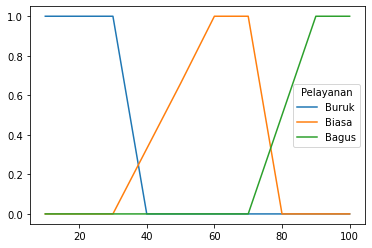

In [38]:
# plot Pelayanan

y1 = [1,1,1,0,0,0,0,0,0,0]
y2 = [0,0,0,0.33,0.66,1,1,0,0,0]
y3 = [0,0,0,0,0,0,0,0.5,1,1]

rat = [10,20,30,40,50,60,70,80,90,100]

plt.plot(rat, y1, label='Buruk')
plt.plot(rat, y2, label='Biasa')
plt.plot(rat, y3, label='Bagus')
plt.legend(title='Pelayanan')
plt.show()

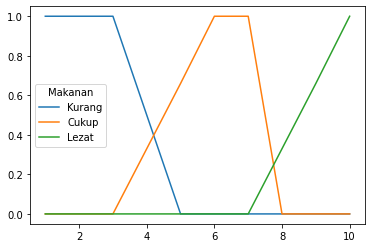

In [39]:
# plot Makanan

y1 = [1,1,1,0.5,0,0,0,0,0,0]
y2 = [0,0,0,0.33,0.66,1,1,0,0,0]
y3 = [0,0,0,0,0,0,0,0.33,0.66,1]

rat = [1,2,3,4,5,6,7,8,9,10]

plt.plot(rat, y1, label='Kurang')
plt.plot(rat, y2, label='Cukup')
plt.plot(rat, y3, label='Lezat')
plt.legend(title='Makanan')
plt.show()

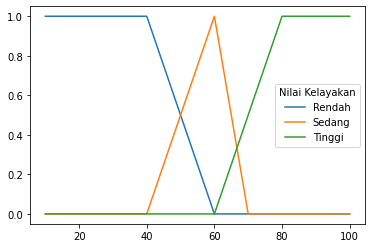

In [40]:
# plot nilai kelayakan

y1 = [1,1,1,1,0.5,0,0,0,0,0]
y2 = [0,0,0,0,0.5,1,0,0,0,0]
y3 = [0,0,0,0,0,0,0.5,1,1,1]

rat = [10,20,30,40,50,60,70,80,90,100]

plt.plot(rat, y1, label='Rendah')
plt.plot(rat, y2, label='Sedang')
plt.plot(rat, y3, label='Tinggi')
plt.legend(title='Nilai Kelayakan')
plt.show()

# Fuzzification

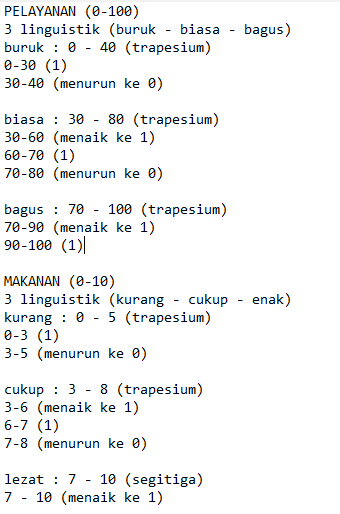

In [41]:
# fungsi fuzzification untuk pelayanan
def fuzzifyPelayanan(data) :
  ret = []
  n = len(data)
  for i in range(n) :
    ret.append(getFuzzyValuePelayanan(data[i]))
  return ret

In [42]:
def getFuzzyValuePelayanan(data) :
  ret = []
  # kategori buruk
  if data >= 0 and data < 40 :
    res = []
    res.append('buruk')
    if data <= 30 :
      res.append(1)
    else :
      sum = 1-((data-30)/10)
      res.append(sum)
    ret.append(res)

  # kategori biasa
  if data > 30 and data < 80 :
    res = []
    res.append('biasa')
    if data < 60 :
      sum = (data-30) / 30
      res.append(sum)
    elif data >= 60 and data <= 70 :
      res.append(1)
    else :
      sum = 1-((data-70)/10)
      res.append(sum)
    ret.append(res)

  # kategori bagus
  if data > 70 and data <= 100 :
    res = []
    res.append('bagus')
    if data < 90 :
      sum = (data-70)/20
      res.append(sum)
    else :
      res.append(1)
    ret.append(res)

  return ret

In [43]:
# fungsi fuzzification untuk makanan
def fuzzifyMakanan(data) :
  ret = []
  n = len(data)
  for i in range(n) :
    ret.append(getFuzzyValueMakanan(data[i]))
  return ret

In [44]:
def getFuzzyValueMakanan(data) :
  ret = []
  res = []
  # kategori kurang
  if data >= 0 and data < 5 :
    res = []
    res.append('kurang')
    if data <= 3 :
        res.append(1)
    else :
        res.append(0.5)
    ret.append(res)
  
  # kategori cukup
  if data > 3 and data < 8 :
    res = []
    res.append('cukup')
    if data < 6 :
      sum = (data-3)/3
      res.append(sum)
    elif data >= 6 and data <= 7 :
      res.append(1)
    ret.append(res)
  
  # kategori lezat
  if data > 6 and data <= 10 :
    res = []
    res.append('lezat')
    sum = (data-6)/4
    if sum == 1.0 :
      sum = int(sum)
    res.append(sum)
    ret.append(res)

  return ret

# Inference

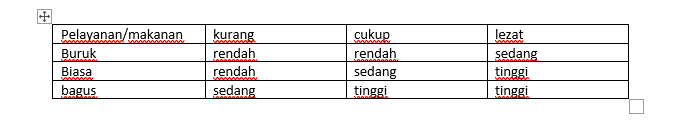

In [45]:
def infr(pel, mak) :
  ret = []
  n = len(pel)
  for i in range(n) :
    ret.append(getInfrValue(pel[i], mak[i]))
  return ret

In [46]:
def getInfrValue(pel, mak) :
  ret = []
  len_pel = len(pel)
  len_mak = len(mak)
  res = []
  for i in range(len_pel) :
    for j in range(len_mak) :
      res = []
      if pel[i][0] == 'buruk' and mak[j][0] == 'kurang' :
        res.append('rendah')
        res.append(min(pel[i][1], mak[j][1]))
      elif pel[i][0] == 'buruk' and mak[j][0] == 'cukup' :
        res.append('rendah')
        res.append(min(pel[i][1], mak[j][1]))
      elif pel[i][0] == 'buruk' and mak[j][0] == 'lezat' :
        res.append('sedang')
        res.append(min(pel[i][1], mak[j][1]))
      elif pel[i][0] == 'biasa' and mak[j][0] == 'kurang' :
        res.append('rendah')
        res.append(min(pel[i][1], mak[j][1]))
      elif pel[i][0] == 'biasa' and mak[j][0] == 'cukup' :
        res.append('sedang')
        res.append(min(pel[i][1], mak[j][1]))
      elif pel[i][0] == 'biasa' and mak[j][0] == 'lezat' :
        res.append('tinggi')
        res.append(min(pel[i][1], mak[j][1]))
      elif pel[i][0] == 'bagus' and mak[j][0] == 'kurang' :
        res.append('sedang')
        res.append(min(pel[i][1], mak[j][1]))
      elif pel[i][0] == 'bagus' and mak[j][0] == 'cukup' :
        res.append('tinggi')
        res.append(min(pel[i][1], mak[j][1]))
      else :
        res.append('tinggi')
        res.append(min(pel[i][1], mak[j][1]))
      ret.append(res)

  new_ret = elimClone(ret)
  return new_ret

# Defuzzification

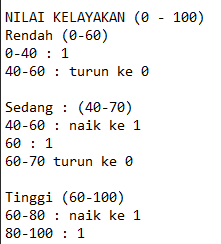

In [47]:
def defuzzy(data) :
  ret = []
  n = len(data)
  for i in range(n) :
    ret.append(getDefuzzyValue(data[i]))
  return ret

In [48]:
def getDefuzzyValue(data) :
  list_template_rendah = [10,20,30,40,50] #50 = 0,5
  n_rendah = 0
  list_template_tinggi = [100,90,80,70] #70 = 0,5
  n_tinggi = 0
  list_template_sedang = [60]
  n_sedang = 0
  ada_Rendah = False
  ada_Tinggi = False
  ada_Sedang = False

  for i in range(len(data)) :
    if data[i][0] == 'rendah' :
      ada_Rendah = True
      if data[i][1] == 1 :
        n_rendah = 4
      else :
        if data[i][1] > 0.5 :
          n_rendah = 4
        else :
          n_rendah = 5
    elif data[i][0] == 'sedang' :
      ada_Sedang = True
      n_sedang = 1
    else :
      ada_Tinggi = True
      if data[i][1] == 1 :
        n_tinggi = 2
      else :
        if data[i][1] > 0.5 :
          n_tinggi = 3
        else :
          n_tinggi = 4

    
  # penentuan index value tinggi, sedang dan rendah
  pos_tinggi = -1
  pos_rendah = -1
  pos_sedang = -1
  if ada_Rendah == True :
      pos_rendah = 0

  if ada_Tinggi == True :
    if len(data) == 3 :
      pos_tinggi = 2
    elif len(data) == 2 :
      pos_tinggi = 1
    else :
      pos_tinggi = 0

  if ada_Sedang == True :
    if len(data) == 3 :
      pos_sedang = 1
    elif len(data) == 2 :
      if ada_Rendah == True :
        pos_sedang = 1
      else :
        pos_sedang = 0
    else :
      pos_sedang = 0

  # center of gravity
  atas1 = 0
  atas2 = 0
  atas3 = 0
  bawah = 0
  if pos_rendah != -1 :
    for i in range(n_rendah) :
      atas1 += list_template_rendah[i]
    atas1= atas1 * data[pos_rendah][1]
    bawah = bawah + (n_rendah * data[pos_rendah][1])
  if pos_tinggi != -1 :
    for i in range(n_tinggi) :
      atas2 += list_template_tinggi[i]
    atas2 = atas2 * data[pos_tinggi][1]
    bawah = bawah + (n_tinggi * data[pos_tinggi][1])
  if pos_sedang != -1 :
    for i in range(n_sedang) :
      atas3 += list_template_sedang[i]
    atas3 = atas3 * data[pos_sedang][1]
    bawah = bawah + (n_sedang * data[pos_sedang][1])

  res = (atas1+atas2+atas3) / bawah
  ret = []
  ret.append(res)
  return ret




# **Main Function**

In [49]:
# Fungsi utama Fuzzy Logic

# data_pelayanan = pel
# data_makanan = mak
def fuzzyLogic(pel, mak) :
  # fuzzification
  fuzzy_pel = fuzzifyPelayanan(pel)
  fuzzy_mak = fuzzifyMakanan(mak)

  # inference
  inf_list = infr(fuzzy_pel, fuzzy_mak)

  # defuzzification
  defuz_list = defuzzy(inf_list)
  # append id
  for i in range (1, 101) :
    defuz_list[i-1].append(i)
  
  return defuz_list

In [50]:
# membaca file excel
dataset = pd.read_excel('restoran.xlsx')

# memisahkan kolom pelayanan dan makanan
data_pelayanan = dataset.pelayanan
data_makanan = dataset.makanan

fuzzy_list = fuzzyLogic(data_pelayanan, data_makanan)
fuzzy_top10 = findTop10(fuzzy_list)
top10 = []
for i in range(10) :
  top10.append(fuzzy_top10[i][1])
print(*top10, sep='\n')

25
42
54
16
31
51
6
20
24
79


In [51]:
# export ke file xls
row = 0
column = 0

book = xlwt.Workbook(encoding='utf-8')
sheet1 = book.add_sheet('Sheet 1')


for item in top10 :
  sheet1.write(row,column,item)
  row += 1

book.save('peringkat.xls')